# CA1 – Data Preparation

**Name:** Diogenes Costa Gomes  
**Module Title:** Data Preparation  
**Assignment Title:** CA1_DataPrep_HDip  
**Cohort Details:** HDip in Data Analytics  
**Lecturer(s)::** David McQuaid  
**Issue Date:** 10/03/2025  

# AI Usage Declaration

Parts of this assignment were supported using generative AI tools (such as ChatGPT) strictly for the purposes allowed by the module guidelines.  
These included:
- Brainstorming structure and ideas
- Reviewing and clarifying concepts
- Improving clarity of Markdown explanations
- Helping with code readability and interpretation

No part of the code or written content was directly copied from AI tools without validation, and all outputs were reviewed and edited to ensure they reflect my understanding of the material.


## Step 0 — Contextualising The Dataset.

This project makes use of a version of the Spam E-mail Database by George Formanat Hewlett-Packard Labs(1999)

This consists of 4,601 examples, approximately 39.4% is junk mail.

The target variable is_spam shows a 1 if the email is spam or a 0 otherwise.

## About the features:

Each feature represents:

- Count of specific terms (wordfreqmake,wordfreqaddress, etc.)

- Special characters frequency( charfreq$, charfreq!, etc.)

- Capitalisation statistics (the number of upper case characters, number of consecutive upper case chars, →Length of uppercase sequences)

We use these variables (directly from real e-mails) to find patterns that are typical of spam messages. Another very famous dataset that academics use to to ask students to build binary classifiers and to do spam detection tasks.

# Target Variable: is_spam

The dataset consists of a column called **is_spam** which is the **target variable** for the project.

1 means the email is **spam** (unsolicited mail)  
0 means the email is **not spam** (legitimate)

Do not drop this column because this is the primary target variable we want to predict. This is the variable that is going to be the target (y) while all other columns would be features (X) during modeling.

# Step 1 – Load and Clean the Dataset

In this step, we load the raw dataset and inspect it for common data quality issues.
We look for:

- Redundant columns (like index columns created during export)
- Text-based numeric values that need conversion
- Missing values that could affect the analysis or modeling stages

By ensuring a clean dataset, we avoid errors and improve the reliability of future steps such as visualization, transformation, and modeling.

In [6]:
import pandas as pd
import numpy as np
from IPython.display import display

# Load dataset
df = pd.read_csv("spambase_v5.csv")

# Preview first rows and data types
display(df.head())
df.info()

# Drop unnecessary index column
df.drop("Unnamed: 0", axis=1, inplace=True)

# Convert specific columns to numeric
cols_to_fix = ['word_freq_3d', 'word_freq_our', 'word_freq_will', 'word_freq_000',
               'word_freq_hpl', 'word_freq_labs', 'capital_run_length_longest']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
print("Before dropna:", df.shape)
df.dropna(inplace=True)
print("After dropna:", df.shape)  

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   object 
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   object 
 13  word_freq_people            4601 

In [7]:
# View number of rows and columns
print(f"Shape: {df.shape}")

# View column names
print("Columns:", df.columns.tolist())

Shape: (4270, 58)
Columns: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq

# Stage 2 – Exploratory Data Analysis (EDA)

To further explore the structure and distribution of the dataset before modelling.

In this step, we:

- Plot the target variable class balance is_spam

- Examine the relationships between characteristics

This assists in realizing any possible correlations, biases, or variable redundancy that can begin affecting model performance.

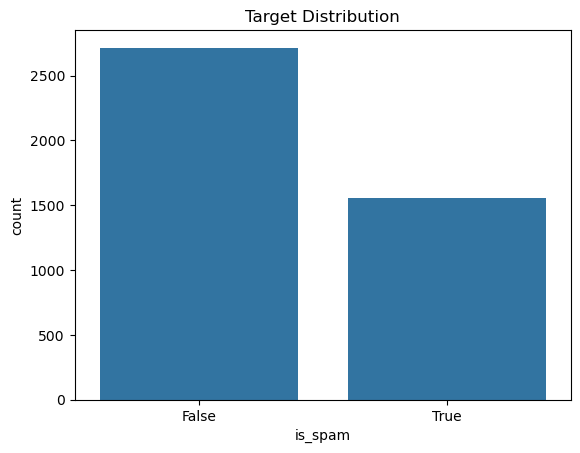

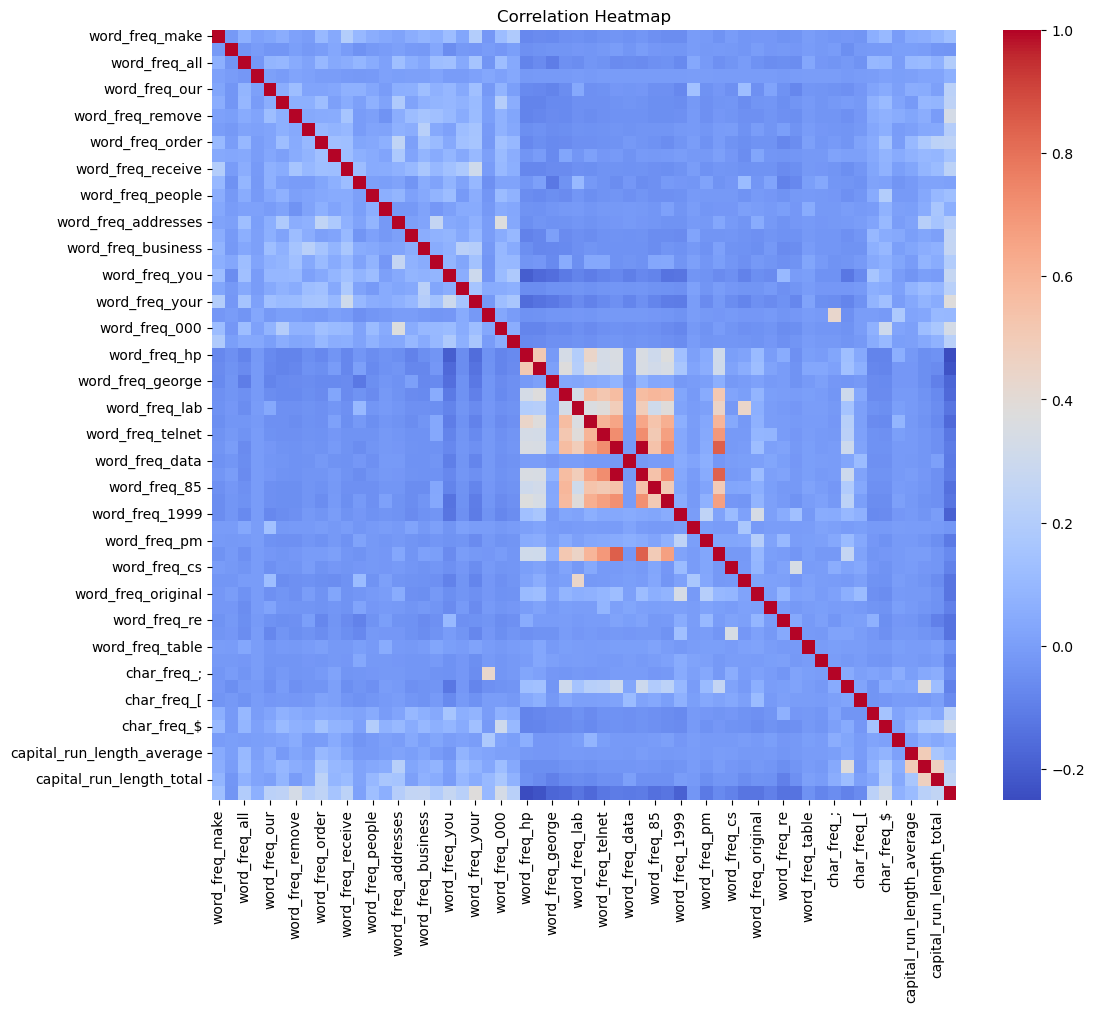

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target
sns.countplot(x='is_spam', data=df)
plt.title("Target Distribution")
plt.show()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Step 3 – Data Preparation: Feature Scaling
Machine learning algorithms often perform better when features are on the same scale.

Here, we standardize the numerical features using StandardScaler to give them zero mean and unit variance.

This is especially important for PCA and distance-based models.

In [11]:
from sklearn.preprocessing import StandardScaler

# Split data
X = df.drop("is_spam", axis=1)
y = df["is_spam"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
print("Original mean:", X.mean().mean())
print("Scaled mean:", X_scaled.mean())

print("Original std:", X.std().mean())
print("Scaled std:", X_scaled.std())


Original mean: 6.132831357081227
Scaled mean: -4.904522766247456e-18
Original std: 15.462827730849124
Scaled std: 1.0


It was applied standardisation to centre and scale the numerical features using `StandardScaler`.  
This step ensures that each feature contributes equally to the analysis and improves the performance of techniques like PCA.


# Step 4 — Eliminate features with low variance

Other features may be very similar for all records and thus provide little if any predictive power.

To automatically filter these types of features, we can use VarianceThreshold.

Dimensionality reduction, step one helps focus the model on more informative features, making the model look at fewer dimensions.

In [15]:
from sklearn.feature_selection import VarianceThreshold

# Remove low variance features
selector = VarianceThreshold(threshold=0.01)
X_reduced_prePCA = selector.fit_transform(X)

# Update df
df = df[X.columns[selector.get_support()].tolist() + ["is_spam"]]

# Step 5 – Dimensionality Reduction using PCA
PCA (Principal Component Analysis) helps reduce the number of features while preserving the variance (information) in the dataset.

This reduces computational cost and the risk of overfitting, while still retaining the most relevant data structure.

We aim to retain 99.5% of the variance by selecting an optimal number of components.

In [17]:
from sklearn.decomposition import PCA

# Recalculate scale after feature selection
X = df.drop("is_spam", axis=1)
y = df["is_spam"]
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca.fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.995) + 1
print(f"Number of components to retain 99.5% variance: {n_components}")

# Apply PCA
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

Number of components to retain 99.5% variance: 54


# Step 6 – Curse of Dimensionality
High-dimensional datasets can lead to sparsity, increased complexity, and overfitting in models.

This step explains why dimensionality reduction (like PCA) is not just useful but often necessary when dealing with 
datasets that have many features.

# Step 7 – Model Testing with Random Forest
We now test our data using the Random Forest classifier — a robust ensemble method that works well on structured data.

We compare two models:

- One trained on the full scaled dataset
- One trained on the PCA-reduced dataset

This comparison helps assess whether dimensionality reduction improved or preserved model performance.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
Xr_train, Xr_test, _, _ = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Full data
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

# PCA data
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(Xr_train, y_train)
y_pred_pca = model_pca.predict(Xr_test)

# Reports
print("Model with full dataset:")
print(classification_report(y_test, y_pred_full))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_full))

print("\nModel with PCA-reduced dataset:")
print(classification_report(y_test, y_pred_pca))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))

Model with full dataset:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       780
        True       0.95      0.90      0.93       501

    accuracy                           0.94      1281
   macro avg       0.94      0.94      0.94      1281
weighted avg       0.94      0.94      0.94      1281

Confusion Matrix:
[[757  23]
 [ 50 451]]

Model with PCA-reduced dataset:
              precision    recall  f1-score   support

       False       0.92      0.95      0.94       780
        True       0.92      0.87      0.90       501

    accuracy                           0.92      1281
   macro avg       0.92      0.91      0.92      1281
weighted avg       0.92      0.92      0.92      1281

Confusion Matrix:
[[742  38]
 [ 63 438]]


# Step 8 – Conclusions

Some numbers were read as text because of the wrong format in the source dataset.

Eventually, there were **4,270 rows** for analysis after fixing data types and cleaning null (missing) values.

To improve the data quality, low-variance features were dismissed.

PCA was then performed on this dataset that resulted in its dimension reducing from **58 to 54** but still capturing **99.5% of the original variance**.

We trained and tested two random Forest models:

One with the complete standardized features set

The first one based on the feature set which is reduced using PCA

This model on the full dataset had an **accuracy of 94%**, and precision and recall > 0.93.

The PCA-reduced model obtained a slightly decreased **accuracy of 92%**, but overall performed very well.

This analogy implies that **the reduction of the dataset via PCA produced a more fundamental dataset with only the most powerful predictive properties**.

While there is a slight decline in terms of recall and f1-score, especially for spam class the trade-off is worth it if computational speed and overfitting prevention are key focuses.

# References 

Forman, G., 1999. *Spam E-mail Database*. Hewlett-Packard Labs.  

Cranor, L.F. and LaMacchia, B.A., 1998. Spam! *Communications of the ACM*, 41(8), pp.74–83.  

Scikit-learn, 2024. *Scikit-learn: Machine Learning in Python*. [online] Available at: <https://scikit-learn.org> [Accessed 5 Apr. 2025].
